# Libraries

Here I import some of the relevant libraries for your convinience, but feel free to make changes or import additional libraries, as needed.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from google.colab import files

# General Information

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/afarahi/Scientific-Machine-Learning/main/AHS_2019_Cleaned.CSV').drop('Unnamed: 0', axis=1)
df.head()

,BLACK,HHSEX,METRO,HHGRAD,HHMAR,HHCITSHP,HHAGE,NUMPEOPLE,HINCP,DIVISION,OWNER
0,0.0,1,1.0,44,1,1,52,3,5.409933,5,1.0
1,0.0,2,1.0,44,4,1,80,2,5.303196,1,1.0
2,0.0,1,1.0,47,1,1,72,2,4.825426,7,1.0
3,1.0,2,1.0,40,6,1,60,1,4.544068,4,0.0
4,0.0,2,1.0,39,3,1,80,2,4.309630,4,0.0


We provide a definition of the variables provideded here. These definitions are taken from [2019 AHS definitions](https://www2.census.gov/programs-surveys/ahs/2019/2019\%20AHS\%20Definitions.pdf). If you are interested in learning more about each value please consult with the documentation. Here all the categorical variables are turned into a numeric variable, to see the associated value lables please download [this zip file](AHS 2019 Value Labels Package.zip) and check out the `AHS 2019 Value Labels.csv`. This is important, you later need it!

**Owner.** An owner is someone whose name is on the deed, mortgage, or contract to purchase. In some housing projects for the elderly, the residents can ``purchase'' a unit and pay monthly maintenance fees (including, for example, health, recreation, security, etc.). Such units are treated as owner-occupied. The ``purchaser'' cannot sell the unit, and upon death, ownership reverts to the sponsoring organization; no inheritance claim can occur.

**Household and count of households.** A household comprises all people who occupy a particular housing unit as their usual residence or who live there at the time of the interview and have no usual residence elsewhere. The usual residence is where the person lives and sleeps most of the time. This place is not necessarily the same as a legal, voting, or domicile residence. Households include not only occupants related to the householder but also any lodgers, roomers, boarders, partners, wards, foster children, and resident employees who share the living quarters of the householder. It includes people temporarily away for reasons such as visiting, traveling in connection with their jobs, attending school, in general hospitals, and in other temporary relocations. By definition, the count of households is the same as the count of occupied housing units.

**Black.** The classification of ‘‘race’’ refers to the race of the householder occupying the housing unit. The concept of race, as used by the Census Bureau, does not denote a clear-cut scientific definition of biological stock. Race is determined based on a question that asks for self-identification of a person's race. Respondents who refused to answer or do not know are entered as such
and imputed. Here we use a binary variable Black to indicade whether a household has anyone that self-identify as Black (`BLACK=1`) or not (`BLACK=0`).

**Income.** The survey covers total money income in the 12 months before the interview. It covers people age 16 and older (age 14 and older before 1999) currently living in the housing unit, even if they lived elsewhere during some of the previous 12 months. ``Money income'' is the income received on a regular basis (exclusive of certain money receipts such as capital gains and lump-sum payments) before payments for personal income taxes, social security, union dues, Medicare deductions, etc. It includes income received from wages, salary, commissions, bonuses, and tips; self-employment income from own nonfarm or farm businesses, including proprietorships and partnerships; interest, dividends, net rental income, royalty income, or income from estates and trusts; Social Security or Railroad Retirement income; Supplemental Security Income (SSI); any cash public assistance or welfare payments from the state or local welfare office; retirement, survivor, or disability benefits; and any other sources of income received regularly such as Veterans' (VA) payments, unemployment and/or worker's compensation, child support, and alimony. Respondents are asked to report income from the job at which the respondent worked the greatest number of weeks during the previous 12 months. A person's longest job is not necessarily the longest they have ever had. If the person had two or more jobs of equal length in the previous 12 months, the most recent job is considered the longest. The reported numbers are $log_{10}(income)$.

**Citizenship of householder.** Place of birth was asked for each householder and every household member. There are five categories of citizenship status: (1) born in the United States, (2) born in Puerto Rico or another U.S. outlying area, (3) born abroad of U.S. citizen parents, (4) naturalized citizens, or (5) noncitizens. People born in the United States are citizens at birth. Citizen by birth refers to categories 1-4 above.

**Division.** The U.S. is divided into four regions (Northeast, Midwest, South, and West) nine divisions.

*Northeast.* The Northeast region is comprised of two
Census Divisions - New England and Middle Atlantic -
as well as the following states: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, and New Jersey.

*Midwest.* The Midwest region is comprised of two Census Divisions–East North Central and West North Central–as well as the following states: Ohio, Indiana, Illinois, Michigan, Wisconsin, Minnesota, Iowa, Missouri, Kansas, Nebraska, North Dakota, and South Dakota.

*South.* The South region is comprised of three Census Divisions–South Atlantic, East South Central, and West South Central–as well as the following states: Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Alabama, Mississippi, Tennessee, Kentucky, Arkansas, Louisiana, Oklahoma, and Texas.

*West.* The West region is comprised of two Census Divisions– Mountain and Pacific–as well as the following states: Montana, Wyoming, Colorado, New Mexico, Arizona, Utah, Idaho, Alaska, Washington, Oregon, Nevada, California, and Hawaii.

**Metropolitan/micropolitan area.** Metropolitan areas are composed of whole counties (towns in New England) that have significant levels of commuting and contiguous urban areas in common. They may cross state lines and usually include large amounts of rural land and farmland, provided the county or town as a whole qualifies. A metropolitan or micropolitan statistical area's geographic composition, or list of geographic components at a particular point in time, is referred to as its "delineation." Metropolitan and micropolitan statistical areas are delineated by the U.S. Office of Management and Budget (OMB) and are the result of the application of published standards to Census Bureau data.

# Logistic Regression

Now, let's perform logistic regression to predict the likelihood of homeownership.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# Create a logistic regression model using scikit-learn
X = df[['HINCP', 'HHAGE', 'BLACK', 'HHCITSHP', 'HHGRAD', 'HHSEX',
        'METRO', 'HHMAR', 'NUMPEOPLE', 'DIVISION']]
y = df['OWNER']


# Use statsmodels to get p-values
X_with_const = sm.add_constant(X) # statsmodels requires a constant term in the model
logit_model = sm.Logit(y, X_with_const)
result_sm = logit_model.fit()
p_values = result_sm.pvalues[1:] # Ignore the p-value for the constant term
coefficients = result_sm.params[1:] # Get coefficients, ignoring the constant term


# Create a DataFrame to display the results
data = {'Variable': X.columns, 'Slope': coefficients, 'P-value': p_values}
results_df = pd.DataFrame(data)
print(results_df)


Optimization terminated successfully.
         Current function value: 0.506049
         Iterations 6
            Variable     Slope        P-value
HINCP          HINCP  2.023634   0.000000e+00
HHAGE          HHAGE  0.048322   0.000000e+00
BLACK          BLACK -0.620552   3.238045e-88
HHCITSHP    HHCITSHP -0.178447  4.698907e-105
HHGRAD        HHGRAD  0.048763   7.483433e-35
HHSEX          HHSEX -0.063540   5.167293e-03
METRO          METRO -0.493263   3.928566e-32
HHMAR          HHMAR -0.218695  3.795267e-265
NUMPEOPLE  NUMPEOPLE  0.072514   4.357176e-15
DIVISION    DIVISION -0.045902   1.819584e-25


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Define the predictors and response variable for the first model
X1 = df[['HINCP', 'BLACK', 'HHCITSHP', 'HHGRAD', 'HHSEX', 'METRO', 'HHMAR', 'NUMPEOPLE', 'DIVISION']]
y = df['OWNER']

# Define the predictors and response variable for the second model
X2 = df[['HHAGE', 'METRO', 'NUMPEOPLE', 'DIVISION', 'BLACK']]
y = df['OWNER']

# Compute the average age of homeowners for the entire dataset
average_age_homeowners = df[df['OWNER'] == 1]['HHAGE'].mean()

# Initialize lists to store accuracy and Brier scores
accuracy_scores_1 = []
brier_scores_1 = []
accuracy_scores_2 = []
brier_scores_2 = []

# Initialize lists to store calibration data
calibration_scores_1 = []
calibration_scores_2 = []

# Initialize lists to store weighted average ages
weighted_avg_ages_1 = []
weighted_avg_ages_2 = []

# Run 10 loops
for _ in range(500):
    # Split the data into training and testing sets using index
    train_idx, test_idx = train_test_split(df.index, test_size=0.5, random_state=None)
    X1_train, X1_test = X1.loc[train_idx], X1.loc[test_idx]
    y1_train, y1_test = y.loc[train_idx], y.loc[test_idx]
    X2_train, X2_test = X2.loc[train_idx], X2.loc[test_idx]
    y2_train, y2_test = y.loc[train_idx], y.loc[test_idx]

    # Train the logistic regression model for the first set
    model1 = LogisticRegression(max_iter=1000)
    model1.fit(X1_train, y1_train)

    # Predict the response for the test set for the first model
    y1_pred = model1.predict(X1_test)
    y1_prob = model1.predict_proba(X1_test)[:, 1]

    # Compute accuracy and Brier score for the first model
    accuracy_scores_1.append(accuracy_score(y1_test, y1_pred))
    brier_scores_1.append(brier_score_loss(y1_test, y1_prob))

    # Compute calibration for the first model
    prob_true_1, prob_pred_1 = calibration_curve(y1_test, y1_prob, n_bins=10)
    calibration_scores_1.append((prob_true_1, prob_pred_1))

    # Compute the weighted average age of homeowners in the test sample for the first model
    weighted_avg_age_1 = (df.loc[test_idx, 'HHAGE'] * y1_prob).sum() / y1_prob.sum()
    weighted_avg_ages_1.append(weighted_avg_age_1)

    # Train the logistic regression model for the second set
    model2 = LogisticRegression(max_iter=1000)
    model2.fit(X2_train, y2_train)

    # Predict the response for the test set for the second model
    y2_pred = model2.predict(X2_test)
    y2_prob = model2.predict_proba(X2_test)[:, 1]

    # Compute accuracy and Brier score for the second model
    accuracy_scores_2.append(accuracy_score(y2_test, y2_pred))
    brier_scores_2.append(brier_score_loss(y2_test, y2_prob))

    # Compute calibration for the second model
    prob_true_2, prob_pred_2 = calibration_curve(y2_test, y2_prob, n_bins=10)
    calibration_scores_2.append((prob_true_2, prob_pred_2))

    # Compute the weighted average age of homeowners in the test sample for the second model
    weighted_avg_age_2 = (df.loc[test_idx, 'HHAGE'] * y2_prob).sum() / y2_prob.sum()
    weighted_avg_ages_2.append(weighted_avg_age_2)

In [ ]:
# Define the predictors and response variable for the first model
# df[['HHAGE', 'METRO', 'NUMPEOPLE', 'DIVISION', 'BLACK']]#
X3 =  df[['HINCP', 'HHAGE', 'BLACK', 'HHCITSHP', 'HHGRAD', 'HHSEX', 'METRO', 'HHMAR', 'NUMPEOPLE', 'DIVISION']]
y = df['OWNER']

# Initialize lists to store accuracy, Brier scores, and calibration data for the Random Forest model
accuracy_scores_3 = []
brier_scores_3 = []
calibration_scores_3 = []
weighted_avg_ages_3 = []

# Run 200 loops
for _ in range(500):
    # Split the data into training and testing sets using index
    train_idx, test_idx = train_test_split(df.index, test_size=0.5, random_state=None)
    X3_train, X3_test = X3.loc[train_idx], X3.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    # Train the Random Forest model
    model3 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=None)
    model3.fit(X3_train, y_train)

    # Predict the response for the test set for the Random Forest model
    y3_pred = model3.predict(X3_test)
    y3_prob = model3.predict_proba(X3_test)[:, 1]

    # Compute accuracy and Brier score for the Random Forest model
    accuracy_scores_3.append(accuracy_score(y_test, y3_pred))
    brier_scores_3.append(brier_score_loss(y_test, y3_prob))

    # Compute calibration for the Random Forest model
    prob_true_3, prob_pred_3 = calibration_curve(y_test, y3_prob, n_bins=10)
    calibration_scores_3.append((prob_true_3, prob_pred_3))

    # Compute the weighted average age of homeowners in the test sample for the Random Forest model
    weighted_avg_age_3 = (df.loc[test_idx, 'HHAGE'] * y3_prob).sum() / y3_prob.sum()
    weighted_avg_ages_3.append(weighted_avg_age_3)


In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
# Initialize lists to store the max utilities for each model
max_utility_1 = []
max_utility_2 = []
max_utility_3 = []

# Run 200 loops
for _ in range(500):
    # Split the data into training and testing sets using index
    train_idx, test_idx = train_test_split(df.index, test_size=0.5, random_state=None)
    X1_train, X1_test = X1.loc[train_idx], X1.loc[test_idx]
    X2_train, X2_test = X2.loc[train_idx], X2.loc[test_idx]
    X3_train, X3_test = X3.loc[train_idx], X3.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    # Train the Logistic Regression models
    model1 = LogisticRegression(max_iter=1000)
    model2 = LogisticRegression(max_iter=1000)
    model1.fit(X1_train, y_train)
    model2.fit(X2_train, y_train)

    # Train the Random Forest model
    model3 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=None)
    model3.fit(X3_train, y_train)

    # Predict probabilities for the test set
    y1_prob = model1.predict_proba(X1_test)[:, 1]
    y2_prob = model2.predict_proba(X2_test)[:, 1]
    y3_prob = model3.predict_proba(X3_test)[:, 1]

    # Compute ROC curve and find the best threshold for maximum 0-1 utility
    fpr1, tpr1, thresholds1 = roc_curve(y_test, y1_prob)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, y2_prob)
    fpr3, tpr3, thresholds3 = roc_curve(y_test, y3_prob)

    utility_1 = tpr1 - fpr1
    utility_2 = tpr2 - fpr2
    utility_3 = tpr3 - fpr3

    best_idx_1 = np.argmax(utility_1)
    best_idx_2 = np.argmax(utility_2)
    best_idx_3 = np.argmax(utility_3)

    best_threshold_1 = thresholds1[best_idx_1]
    best_threshold_2 = thresholds2[best_idx_2]
    best_threshold_3 = thresholds3[best_idx_3]

    # Calculate the max utility on the test sample
    max_utility_1.append(utility_1[best_idx_1])
    max_utility_2.append(utility_2[best_idx_2])
    max_utility_3.append(utility_3[best_idx_3])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

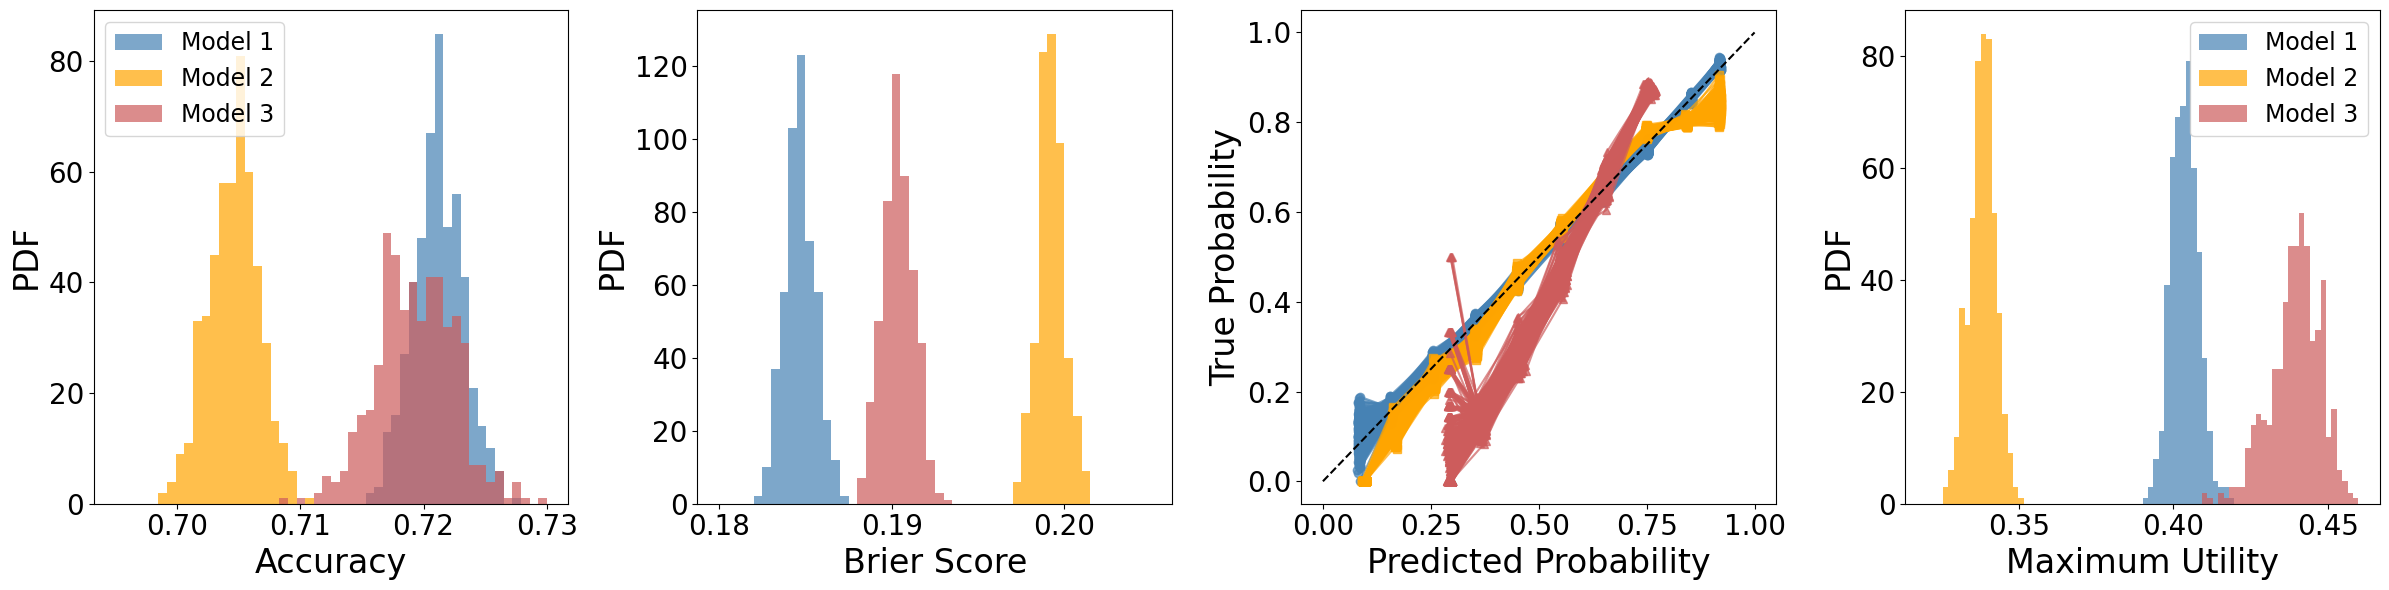

In [ ]:
# Create the plot with four panels: Brier scores, accuracies, calibration, and average age
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))

# Plot for Accuracies
axes[0].hist(accuracy_scores_1, range=(0.695, 0.73), bins=50, alpha=0.7, color='steelblue', label='Model 1')
axes[0].hist(accuracy_scores_2, range=(0.695, 0.73), bins=50, alpha=0.7, color='orange', label='Model 2')
axes[0].hist(accuracy_scores_3, range=(0.695, 0.73), bins=50, alpha=0.7, color='indianred', label='Model 3')
axes[0].set_xlabel('Accuracy', size=24)
axes[0].set_ylabel('PDF', size=24)
axes[0].legend(prop={'size':'17'})
axes[0].tick_params(axis='both', which='major', labelsize=20)

# Plot for Brier Scores
axes[1].hist(brier_scores_1, range=(0.18, 0.205), bins=50, alpha=0.7, color='steelblue', label='Model 1')
axes[1].hist(brier_scores_2, range=(0.18, 0.205), bins=50, alpha=0.7, color='orange', label='Model 2')
axes[1].hist(brier_scores_3, range=(0.18, 0.205), bins=50, alpha=0.7, color='indianred', label='Model 3')
axes[1].set_xlabel('Brier Score', size=24)
axes[1].set_ylabel('PDF', size=24)
# axes[1].legend(prop={'size':'14'})
axes[1].tick_params(axis='both', which='major', labelsize=20)

# Plot for Calibration
for prob_true_1, prob_pred_1 in calibration_scores_1:
    axes[2].plot(prob_pred_1, prob_true_1, marker='o', linestyle='-', color='steelblue', alpha=0.7)
for prob_true_2, prob_pred_2 in calibration_scores_2:
    axes[2].plot(prob_pred_2, prob_true_2, marker='s', linestyle='-', color='orange', alpha=0.7)
for prob_true_3, prob_pred_3 in calibration_scores_3:
    axes[2].plot(prob_pred_3, prob_true_3, marker='^', linestyle='-', color='indianred', alpha=0.7)
axes[2].plot([0, 1], [0, 1], linestyle='--', color='black')
# axes[2].set_title('Calibration Plot', size=20)
axes[2].set_xlabel('Predicted Probability', size=24)
axes[2].set_ylabel('True Probability', size=24)
# axes[2].legend(['Perfectly Calibrated', 'Model 1 (Logistic Regression)', 'Model 2 (Logistic Regression)', 'Model 3 (Random Forest)'], prop={'size':'14'})
axes[2].tick_params(axis='both', which='major', labelsize=20)

# Plot for Maximum Utility
axes[3].hist(max_utility_1, range=(0.32, 0.46), bins=80, alpha=0.7, color='steelblue', label='Model 1')
axes[3].hist(max_utility_2, range=(0.32, 0.46), bins=80,  alpha=0.7, color='orange', label='Model 2')
axes[3].hist(max_utility_3, range=(0.32, 0.46), bins=80,  alpha=0.7, color='indianred', label='Model 3')
axes[3].set_xlabel('Maximum Utility', size=24)
axes[3].set_ylabel('PDF', size=24)
axes[3].legend(prop={'size':'17'})
axes[3].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
# plt.show()

# Save the figure with high resolution
plt.savefig('motivation-U-trustworthiness.pdf', bbox_inches='tight')

# Download the figure
files.download('motivation-U-trustworthiness.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

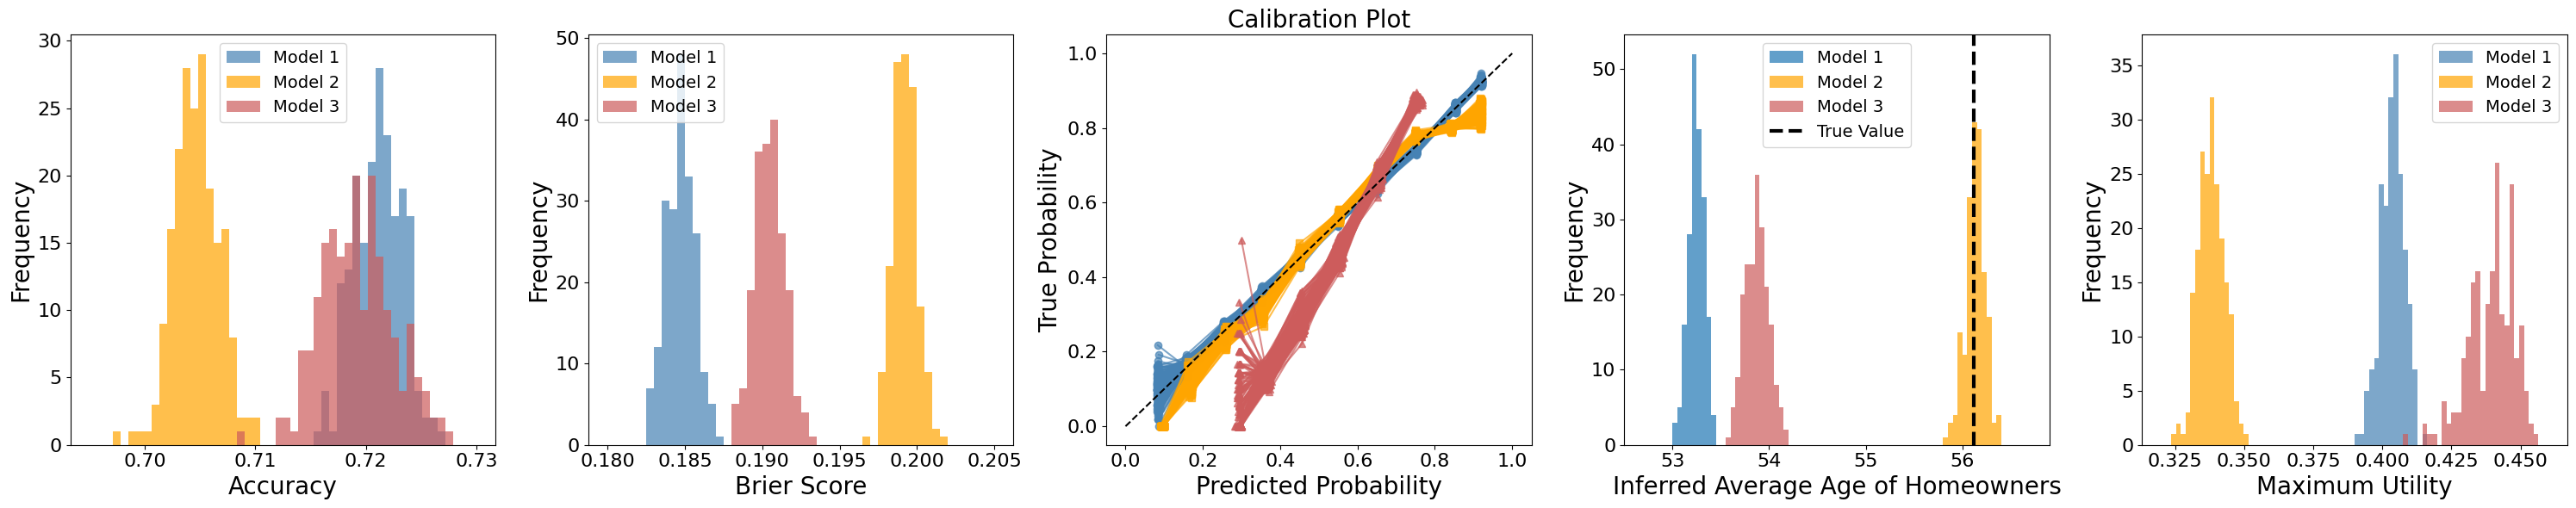

In [ ]:
# Create the plot with four panels: Brier scores, accuracies, calibration, and average age
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 6))

# Plot for Accuracies
axes[0].hist(accuracy_scores_1, range=(0.695, 0.73), bins=50, alpha=0.7, color='steelblue', label='Model 1')
axes[0].hist(accuracy_scores_2, range=(0.695, 0.73), bins=50, alpha=0.7, color='orange', label='Model 2')
axes[0].hist(accuracy_scores_3, range=(0.695, 0.73), bins=50, alpha=0.7, color='indianred', label='Model 3')
axes[0].set_xlabel('Accuracy', size=20)
axes[0].set_ylabel('Frequency', size=20)
axes[0].legend(prop={'size':'14'})
axes[0].tick_params(axis='both', which='major', labelsize=16)

# Plot for Brier Scores
axes[1].hist(brier_scores_1, range=(0.18, 0.205), bins=50, alpha=0.7, color='steelblue', label='Model 1')
axes[1].hist(brier_scores_2, range=(0.18, 0.205), bins=50, alpha=0.7, color='orange', label='Model 2')
axes[1].hist(brier_scores_3, range=(0.18, 0.205), bins=50, alpha=0.7, color='indianred', label='Model 3')
axes[1].set_xlabel('Brier Score', size=20)
axes[1].set_ylabel('Frequency', size=20)
axes[1].legend(prop={'size':'14'})
axes[1].tick_params(axis='both', which='major', labelsize=16)

# Plot for Calibration
for prob_true_1, prob_pred_1 in calibration_scores_1:
    axes[2].plot(prob_pred_1, prob_true_1, marker='o', linestyle='-', color='steelblue', alpha=0.7)
for prob_true_2, prob_pred_2 in calibration_scores_2:
    axes[2].plot(prob_pred_2, prob_true_2, marker='s', linestyle='-', color='orange', alpha=0.7)
for prob_true_3, prob_pred_3 in calibration_scores_3:
    axes[2].plot(prob_pred_3, prob_true_3, marker='^', linestyle='-', color='indianred', alpha=0.7)
axes[2].plot([0, 1], [0, 1], linestyle='--', color='black')
axes[2].set_title('Calibration Plot', size=20)
axes[2].set_xlabel('Predicted Probability', size=20)
axes[2].set_ylabel('True Probability', size=20)
# axes[2].legend(['Perfectly Calibrated', 'Model 1 (Logistic Regression)', 'Model 2 (Logistic Regression)', 'Model 3 (Random Forest)'], prop={'size':'14'})
axes[2].tick_params(axis='both', which='major', labelsize=16)

# Plot for Weighted Average Age
axes[3].hist(weighted_avg_ages_1, range=(52.7, 56.7), bins=80, alpha=0.7, label='Model 1')
axes[3].hist(weighted_avg_ages_2, range=(52.7, 56.7), bins=80, alpha=0.7, color='orange', label='Model 2')
axes[3].hist(weighted_avg_ages_3, range=(52.7, 56.7), bins=80, alpha=0.7, color='indianred', label='Model 3')
axes[3].axvline(average_age_homeowners, color='black', lw='3', linestyle='--', label='True Value')
axes[3].set_xlabel('Inferred Average Age of Homeowners', size=20)
axes[3].set_ylabel('Frequency', size=20)
axes[3].legend(prop={'size':'14'})
axes[3].tick_params(axis='both', which='major', labelsize=16)

# Plot for Maximum Utility
axes[4].hist(max_utility_1, range=(0.32, 0.46), bins=80, alpha=0.7, color='steelblue', label='Model 1')
axes[4].hist(max_utility_2, range=(0.32, 0.46), bins=80,  alpha=0.7, color='orange', label='Model 2')
axes[4].hist(max_utility_3, range=(0.32, 0.46), bins=80,  alpha=0.7, color='indianred', label='Model 3')
axes[4].set_xlabel('Maximum Utility', size=20)
axes[4].set_ylabel('Frequency', size=20)
axes[4].legend(prop={'size':'14'})
axes[4].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
# plt.show()

# Save the figure with high resolution
plt.savefig('motivation-trustworthiness.pdf', bbox_inches='tight')

# Download the figure
files.download('motivation-trustworthiness.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

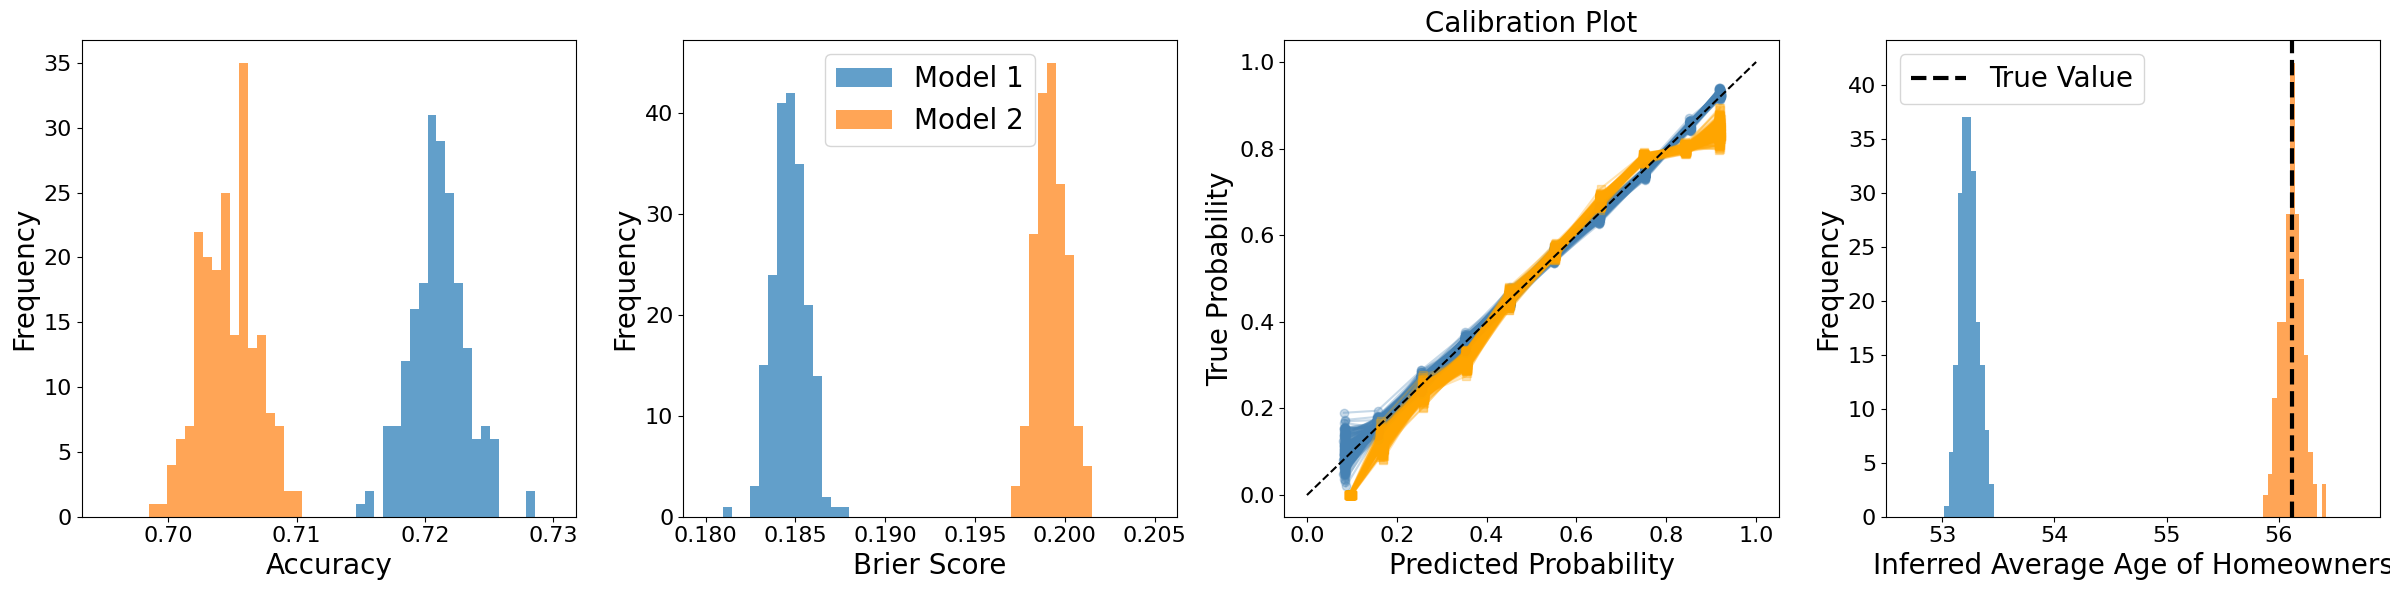

In [ ]:
# Create the plot with four panels: Brier scores, accuracies, calibration, and average age
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))

# Plot for Accuracies
axes[0].hist(accuracy_scores_1, range=(0.695, 0.73), bins=50, alpha=0.7, label='Model 1')
axes[0].hist(accuracy_scores_2, range=(0.695, 0.73), bins=50,  alpha=0.7, label='Model 2')
axes[0].set_xlabel('Accuracy', size=20)
axes[0].set_ylabel('Frequency', size=20)
#axes[1].legend(prop={'size':'20'})
axes[0].tick_params(axis='both', which='major', labelsize=16)

# Plot for Brier Scores
axes[1].hist(brier_scores_1, range=(0.18, 0.205), bins=50, alpha=0.7, label='Model 1')
axes[1].hist(brier_scores_2, range=(0.18, 0.205), bins=50, alpha=0.7, label='Model 2')
axes[1].set_xlabel('Brier Score', size=20)
axes[1].set_ylabel('Frequency', size=20)
axes[1].legend(prop={'size':'20'})
axes[1].tick_params(axis='both', which='major', labelsize=16)

# Plot for Calibration
for prob_true_1, prob_pred_1 in calibration_scores_1:
    axes[2].plot(prob_pred_1, prob_true_1, marker='o', linestyle='-', color='steelblue', alpha=0.3)
for prob_true_2, prob_pred_2 in calibration_scores_2:
    axes[2].plot(prob_pred_2, prob_true_2, marker='s', linestyle='-', color='orange', alpha=0.3)
axes[2].plot([0, 1], [0, 1], linestyle='--', color='black')
axes[2].set_title('Calibration Plot', size=20)
axes[2].set_xlabel('Predicted Probability', size=20)
axes[2].set_ylabel('True Probability', size=20)
#axes[2].legend(['Perfectly Calibrated', 'Model 1', 'Model 2'])
axes[2].tick_params(axis='both', which='major', labelsize=16)

# Plot for Weighted Average Age
axes[3].hist(weighted_avg_ages_1, range=(52.7, 56.7), bins=100, alpha=0.7)
axes[3].hist(weighted_avg_ages_2, range=(52.7, 56.7), bins=100, alpha=0.7)
axes[3].axvline(average_age_homeowners, color='black', lw='3', linestyle='--', label='True Value')
# axes[3].set_title('Inferred Average Age of Homeowners', size=20)
axes[3].set_xlabel('Inferred Average Age of Homeowners', size=20)
axes[3].set_ylabel('Frequency', size=20)
axes[3].legend(prop={'size':'20'})
axes[3].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()

# Save the figure with high resolution
# plt.savefig('motivation_I-trustworthiness.pdf', bbox_inches='tight')

# Download the figure
# files.download('motivation_I-trustworthiness.pdf')

# Hypothesis Testing

In [ ]:
import jax.numpy as jnp
from sklearn.metrics import pairwise_kernels
import jax.random as random
from jax import vmap, jit

In [ ]:
def create_kernel(p, prob_kernel_width):

    K_pp_gamma = 1.0 / (prob_kernel_width**2)
    K_pp_data = p[:, jnp.newaxis]
    K_pp = pairwise_kernels(K_pp_data, K_pp_data, metric="rbf", gamma=K_pp_gamma)
    return jnp.array(K_pp)

def ELCE2_estimator(K_xx, err):

    K = (err.flatten() * K_xx.T).T * err.flatten()
    return K.sum() - K.diagonal().sum()

def ELCE2_normalization(K):

    size = K.shape[0]
    return (size - 1.0) * K.sum() / size

def ELCE2_null_estimator(err, K, key):

    idx = random.permutation(key, len(err))
    return ELCE2_estimator(K, err[idx])

vmapped_ELCE2_null_estimator = jit(vmap(ELCE2_null_estimator, (None, None, 0)))

def compute_null_distribution(p_err, K, key, iterations):

    keys = random.split(key, iterations)
    test_null = vmapped_ELCE2_null_estimator(p_err, K, keys)
    return test_null

def ELCE2(Y, p, prob_kernel_width, iterations, key):

    K = create_kernel(p, prob_kernel_width=prob_kernel_width)
    p_err = Y - p

    test_value = ELCE2_estimator(K, p_err)

    resolution = 1.0 / iterations

    test_null = compute_null_distribution(p_err, K, key, iterations)

    p_value = jnp.max(jnp.array([resolution, resolution * jnp.sum(test_null > test_value)]))

    return p_value

In [ ]:
def test_p_value(N, iterations, key, prob_kernel_width):
    keys = random.split(key, 2)
    X, Y, p = generate_data(N, keys[0])
    p_value = ELCE2(Y, p, prob_kernel_width, iterations, keys[1])
    return p_value


def generate_data(N, key):

    # Generate random key for subkeys
    key, subkey1, subkey2 = random.split(key, 3)

    # Generate input data X from a normal distribution
    X = random.normal(subkey1, shape=(N, 1))

    # Generate logistic model parameters
    beta = 0.5
    intercept = -1.0

    # Calculate the probability vector p
    linear_combination = intercept + beta * X
    p = 1 / (1 + jnp.exp(-linear_combination))

    # Generate binary outcomes Y based on the probabilities p
    Y = random.bernoulli(subkey2, p).astype(jnp.float32)

    return X, jnp.squeeze(Y), jnp.squeeze(p)

In [ ]:
def vectorize_test_p_value(N, iterations, key, prob_kernel_width):

    # Generate 4000 keys
    keys = random.split(key, 4000)

    # Compute p-values for 4000 realizations
    p_values = [test_p_value(N, iterations, key_, prob_kernel_width) for key_ in keys]

    # Convert to a standard JAX array
    p_values = jnp.array(p_values)

    # Compute the number of times p_value < 0.05
    rate = jnp.sum(p_values <= 0.05) / 4000.0

    return rate


In [ ]:
N = 50
iterations = 1000
random_state = 6733
prob_kernel_width = jnp.linspace(0.01, 0.99, 11)

key = random.PRNGKey(random_state)

rate = [vectorize_test_p_value(N, iterations, key, kw.item()) for kw in prob_kernel_width]
print("Number of p-values < 0.05:", rate)

Number of p-values < 0.05: [Array(0.04875, dtype=float32, weak_type=True), Array(0.05075, dtype=float32, weak_type=True), Array(0.04925, dtype=float32, weak_type=True), Array(0.05, dtype=float32, weak_type=True), Array(0.049, dtype=float32, weak_type=True), Array(0.04975, dtype=float32, weak_type=True), Array(0.05, dtype=float32, weak_type=True), Array(0.05, dtype=float32, weak_type=True), Array(0.0495, dtype=float32, weak_type=True), Array(0.0495, dtype=float32, weak_type=True), Array(0.04925, dtype=float32, weak_type=True)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

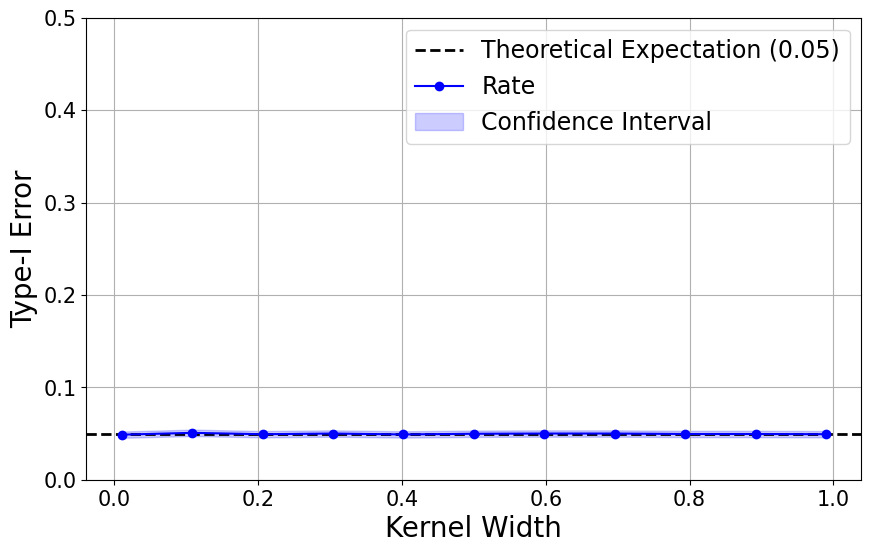

In [ ]:
rate_ = jnp.array(rate)
# Calculate confidence interval
confidence_interval = jnp.sqrt(rate_ * (1.0-rate_) / 4000)

# Plotting
plt.figure(figsize=(10, 6))

# Add horizontal line at 0.05
plt.axhline(y=0.05, color='k', lw=2, linestyle='--', label='Theoretical Expectation (0.05)')

plt.plot(prob_kernel_width, rate_, marker='o', linestyle='-', color='b', label='Rate')
# Add shaded confidence interval
plt.fill_between(prob_kernel_width, rate_ - confidence_interval, rate_ + confidence_interval,
                 color='b', alpha=0.2, label='Confidence Interval')

# Set ylim from 0.0 to 0.5
plt.ylim(0.0, 0.5)

# Set labels and title
plt.xlabel('Kernel Width', fontsize=20)
plt.ylabel('Type-I Error', fontsize=20)
# plt.title('Rate as a Function of Prob Kernel Width', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add legend
plt.legend(fontsize=17)

# Show plot
plt.grid(True)

# Save the figure with high resolution
plt.savefig('Type-I-kernel-width.pdf', bbox_inches='tight')

# Download the figure
files.download('Type-I-kernel-width.pdf')

In [ ]:
N = jnp.array([20, 40, 60, 80, 100])
iterations = 1000
random_state = 6733
prob_kernel_width = 0.2

key = random.PRNGKey(random_state)

Nrate = [vectorize_test_p_value(N_.item(), iterations, key, prob_kernel_width) for N_ in N]
print("Number of p-values < 0.05:", rate)

Number of p-values < 0.05: [Array(0.04875, dtype=float32, weak_type=True), Array(0.05075, dtype=float32, weak_type=True), Array(0.04925, dtype=float32, weak_type=True), Array(0.05, dtype=float32, weak_type=True), Array(0.049, dtype=float32, weak_type=True), Array(0.04975, dtype=float32, weak_type=True), Array(0.05, dtype=float32, weak_type=True), Array(0.05, dtype=float32, weak_type=True), Array(0.0495, dtype=float32, weak_type=True), Array(0.0495, dtype=float32, weak_type=True), Array(0.04925, dtype=float32, weak_type=True)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

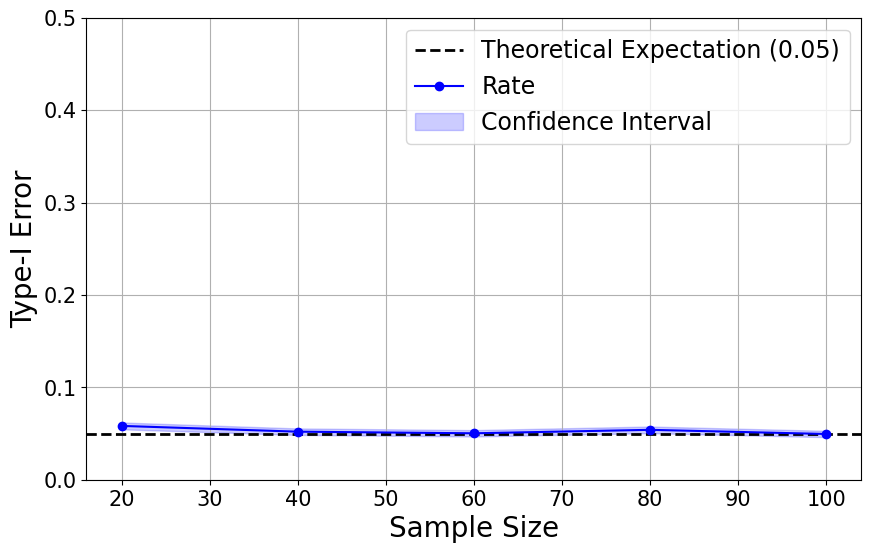

In [ ]:
rate_ = jnp.array(Nrate)
# Calculate confidence interval
confidence_interval = jnp.sqrt(rate_ * (1.0-rate_) / 4000)

# Plotting
plt.figure(figsize=(10, 6))

# Add horizontal line at 0.05
plt.axhline(y=0.05, color='k', lw=2, linestyle='--', label='Theoretical Expectation (0.05)')

plt.plot(N, rate_, marker='o', linestyle='-', color='b', label='Rate')
# Add shaded confidence interval
plt.fill_between(N, rate_ - confidence_interval, rate_ + confidence_interval,
                 color='b', alpha=0.2, label='Confidence Interval')

# Set ylim from 0.0 to 0.5
plt.ylim(0.0, 0.5)

# Set labels and title
plt.xlabel('Sample Size', fontsize=20)
plt.ylabel('Type-I Error', fontsize=20)

# Increase font size for tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add legend
plt.legend(fontsize=17)

# Show plot
plt.grid(True)

# Save the figure with high resolution
plt.savefig('Type-I-N.pdf', bbox_inches='tight')

# Download the figure
files.download('Type-I-N.pdf')

In [ ]:
N = 100
iterations = 100
prob_kernel_width = 0.1
key = random.PRNGKey(2325576498)

p_value = test_p_value(N, iterations, key, prob_kernel_width)
print("P-value:", p_value)

P-value: 0.62


In [ ]:
# Example usage
key = random.PRNGKey(0)
p = jnp.array([0.1, 0.4, 0.5, 0.8, 0.9])

kernel_matrix = create_kernel(p, prob_kernel_width=0.1)
print("Kernel matrix:\n", kernel_matrix)

# Example usage
key = random.PRNGKey(0)
err = jnp.array([0.1, -0.2, 0.3, -0.4, 0.5])

result = ELCE2_null_estimator(err, kernel_matrix, key)
print("ELCE2 null estimator result:", result)

test_null_distribution = compute_null_distribution(err, kernel_matrix, key, 10)
print("Test null distribution:\n", test_null_distribution)

# Example usage
Y = jnp.array([0.2, 0.4, 0.6, 0.8, 1.0])
p = jnp.array([0.1, 0.3, 0.5, 0.7, 0.9])
p_value = ELCE2(Y, p, 0.1, 10, key)

#print("Test value:", test_value)
#print("Test null distribution:\n", test_null)
print("P-value:", p_value)

# Example usage
N = 3
iterations = 10
random_state = 0
prob_kernel_width = 0.1
key = random.PRNGKey(random_state)
keys = random.split(key, 2)

X, Y, p = generate_data(N, keys[0])
p_value = ELCE2(Y, p, prob_kernel_width, iterations, keys[1])

print("P-value:", p_value)

# Final Test

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.calibration import calibration_curve
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/afarahi/Scientific-Machine-Learning/main/AHS_2019_Cleaned.CSV'
df = pd.read_csv(url).drop('Unnamed: 0', axis=1)

# Define the feature columns and target column
features_rf = ['BLACK', 'HHSEX', 'METRO', 'HHGRAD', 'HHMAR', 'HHCITSHP', 'HHAGE', 'NUMPEOPLE', 'HINCP', 'DIVISION']
features_lr = ['HHSEX', 'METRO', 'HHGRAD', 'HHMAR', 'HHCITSHP', 'HHAGE', 'NUMPEOPLE', 'HINCP', 'DIVISION']  # Exclude 'BLACK'
features = ['BLACK', 'HHSEX', 'METRO', 'HHGRAD', 'HHMAR', 'HHCITSHP', 'HHAGE', 'NUMPEOPLE', 'HINCP', 'DIVISION']
target = 'OWNER'

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Initialize the models
rf = RandomForestClassifier(max_depth=8, random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=20)

# Train the models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Predict classes on the test set
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Compute accuracies
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Compute Brier scores
brier_score_rf = brier_score_loss(y_test, y_pred_prob_rf)
brier_score_lr = brier_score_loss(y_test, y_pred_prob_lr)
brier_score_knn = brier_score_loss(y_test, y_pred_prob_knn)

# Compute expected calibration errors (ECE)
def expected_calibration_error(y_true, y_prob, n_bins=10):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins)
    ece = np.average(np.abs(prob_true - prob_pred), weights=np.histogram(y_prob, bins=n_bins)[0])
    return ece

ece_rf = expected_calibration_error(y_test, y_pred_prob_rf)
ece_lr = expected_calibration_error(y_test, y_pred_prob_lr)
ece_knn = expected_calibration_error(y_test, y_pred_prob_knn)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}, Brier Score: {brier_score_rf:.4f}, ECE: {ece_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}, Brier Score: {brier_score_lr:.4f}, ECE: {ece_lr:.4f}")
print(f"k-NN Accuracy: {accuracy_knn:.2f}, Brier Score: {brier_score_knn:.4f}, ECE: {ece_knn:.4f}")

# Compute homeownership gap on the test sample using the predictions made by each classifier
def homeownership_gap(X, y_prob):
    return X.assign(pred_prob=y_prob).groupby('BLACK')['pred_prob'].mean().diff().iloc[-1]

gap_rf = homeownership_gap(X_test, y_pred_prob_rf)
gap_lr = homeownership_gap(X_test, y_pred_prob_lr)
gap_knn = homeownership_gap(X_test, y_pred_prob_knn)

print('\n\n')
print(f"Homeownership Gap (Random Forest): {gap_rf:.4f}")
print(f"Homeownership Gap (Logistic Regression): {gap_lr:.4f}")
print(f"Homeownership Gap (k-NN): {gap_knn:.4f}")


Random Forest Accuracy: 0.76, Brier Score: 0.1624, ECE: 0.0305
Logistic Regression Accuracy: 0.75, Brier Score: 0.1663, ECE: 0.0077
k-NN Accuracy: 0.73, Brier Score: 0.1792, ECE: 0.0241



Homeownership Gap (Random Forest): -0.2027
Homeownership Gap (Logistic Regression): -0.2441
Homeownership Gap (k-NN): -0.1153


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Function to compute expected calibration error (ECE)
def expected_calibration_error(y_true, y_prob, n_bins=10):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins)
    ece = np.average(np.abs(prob_true - prob_pred), weights=np.histogram(y_prob, bins=n_bins)[0])
    return ece

# Function to compute homeownership gap
def homeownership_gap(X, y_prob):
    return X.assign(pred_prob=y_prob).groupby('BLACK')['pred_prob'].mean().diff().iloc[-1]

In [ ]:
# Initialize lists to store metrics
accuracy_rf_list, accuracy_lr_list = [], []
brier_rf_list, brier_lr_list = [], []
ece_rf_list, ece_lr_list = [], []
gap_rf_list, gap_lr_list = [], []
gap_diff_rf_list, gap_diff_lr_list = [], []

# Initialize the models
rf = RandomForestClassifier(max_depth=7, random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)

# Run 200 iterations of train/test splits
for i in range(200):

    # Split the data into training and testing sets (70/30 split)
    X_train_rf, X_test_rf, y_train, y_test = train_test_split(df[features_rf], df[target], test_size=0.3, random_state=i)
    X_train_lr, X_test_lr, _, _ = train_test_split(df[features_lr], df[target], test_size=0.3, random_state=i)

    # Train the models
    rf.fit(X_train_rf, y_train)
    lr.fit(X_train_lr, y_train)

    # Predict probabilities on the test set
    y_pred_prob_rf = rf.predict_proba(X_test_rf)[:, 1]
    y_pred_prob_lr = lr.predict_proba(X_test_lr)[:, 1]

    # Predict classes on the test set
    y_pred_rf = rf.predict(X_test_rf)
    y_pred_lr = lr.predict(X_test_lr)

    # Compute and store accuracies
    accuracy_rf_list.append(accuracy_score(y_test, y_pred_rf))
    accuracy_lr_list.append(accuracy_score(y_test, y_pred_lr))

    # Compute and store Brier scores
    brier_rf_list.append(brier_score_loss(y_test, y_pred_prob_rf))
    brier_lr_list.append(brier_score_loss(y_test, y_pred_prob_lr))

    # Compute and store expected calibration errors (ECE)
    ece_rf_list.append(expected_calibration_error(y_test, y_pred_prob_rf))
    ece_lr_list.append(expected_calibration_error(y_test, y_pred_prob_lr))

    # Compute and store homeownership gaps
    gap_rf = homeownership_gap(X_test_rf, y_pred_prob_rf)
    gap_lr = homeownership_gap(X_test_rf.assign(pred_prob=y_pred_prob_lr), y_pred_prob_lr)
    gap_rf_list.append(gap_rf)
    gap_lr_list.append(gap_lr)

    # Compute the actual homeownership gap in the test sample
    actual_gap_test = X_test_rf.assign(OWNER=y_test).groupby('BLACK')['OWNER'].mean().diff().iloc[-1]

    # Compute and store the gap differences
    gap_diff_rf_list.append(actual_gap_test - gap_rf)
    gap_diff_lr_list.append(actual_gap_test - gap_lr)

    if (i % 10==1): print(i, end=', ')


1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

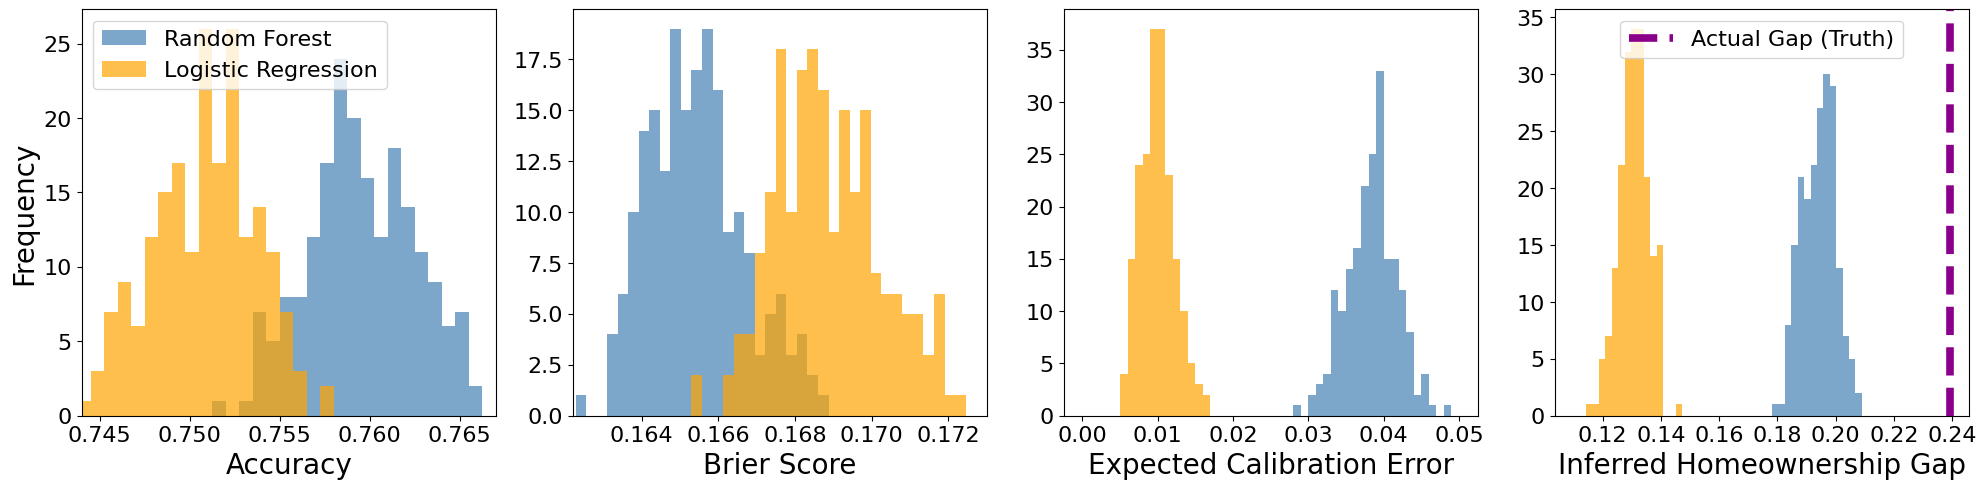

In [ ]:
# Compute the actual homeownership likelihood gap in the full dataset
actual_gap_full = df.groupby('BLACK')[target].mean().diff().iloc[-1]

# Plot distributions of performance metrics
plt.figure(figsize=(20, 5))

# Accuracy plot
plt.subplot(1, 4, 1)
plt.hist(accuracy_rf_list, range=(0.74,0.77), bins=40, alpha=0.7, label='Random Forest', color='steelblue')
plt.hist(accuracy_lr_list, range=(0.74,0.77), bins=40, alpha=0.7, label='Logistic Regression', color='orange')
plt.xlabel('Accuracy', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.legend(loc=2, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0.744, 0.767)

# Brier score plot
plt.subplot(1, 4, 2)
plt.hist(brier_rf_list, range=(0.162,0.173), bins=40, alpha=0.7, label='Random Forest', color='steelblue')
plt.hist(brier_lr_list, range=(0.162,0.173), bins=40, alpha=0.7, label='Logistic Regression', color='orange')
plt.xlabel('Brier Score', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0.1622, 0.173)

# ECE plot
plt.subplot(1, 4, 3)
plt.hist(ece_rf_list, range=(0,0.05), bins=50, alpha=0.7, label='Random Forest', color='steelblue')
plt.hist(ece_lr_list, range=(0,0.05), bins=50, alpha=0.7, label='Logistic Regression', color='orange')
plt.xlabel('Expected Calibration Error', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Homeownership gap plot
plt.subplot(1, 4, 4)
plt.hist(-np.array(gap_rf_list), range=(0.11,0.22), bins=50, alpha=0.7, color='steelblue')
plt.hist(-np.array(gap_lr_list), range=(0.11,0.22), bins=50, alpha=0.7, color='orange')
plt.axvline(-actual_gap_full, color='darkmagenta', linestyle='dashed', linewidth=5.5, label='Actual Gap (Truth)')
plt.xlabel("Inferred Homeownership Gap", fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.legend(loc=9, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

# Save the figure
plt.savefig('calibration-motivation-2.pdf', bbox_inches='tight')
files.download('calibration-motivation-2.pdf')